# Process MAGICC output

Store only relevant percentiles

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path

import dotenv
import pandas as pd
import scmdata.database
import matplotlib.pyplot as plt
import utils

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/database.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
dotenv.load_dotenv()

True

<IPython.core.display.Javascript object>

In [4]:
OUTPUT_DATABASE_DIR = os.path.join(
    utils.DATA_DIR,
    "interim",
    "magicc-output",
    utils.MAGICC_RUN_ID,
)
db = scmdata.database.ScmDatabase(OUTPUT_DATABASE_DIR, levels=("variable", "region"))
db

<scmdata.database.SCMDatabase (root_dir: /data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/interim/magicc-output/7d7c42, levels: ('variable', 'region'))>

<IPython.core.display.Javascript object>

In [5]:
OUT_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "magicc-output",
    utils.MAGICC_RUN_ID,
    "magicc-output-quantiles.nc",
)
os.makedirs(os.path.dirname(OUT_FILE), exist_ok=True)
OUT_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/magicc-output/7d7c42/magicc-output-quantiles.nc'

<IPython.core.display.Javascript object>

In [6]:
OUT_FILE_BOX = os.path.join(
    utils.DATA_DIR,
    "processed",
    "magicc-output",
    utils.MAGICC_RUN_ID,
    "magicc-output-quantiles-for-box.csv",
)
os.makedirs(os.path.dirname(OUT_FILE_BOX), exist_ok=True)
OUT_FILE_BOX

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/magicc-output/7d7c42/magicc-output-quantiles-for-box.csv'

<IPython.core.display.Javascript object>

In [7]:
emms_dat = scmdata.run_append(
    [db.load(variable=v, region="World") for v in ["Emissions|CH4", "Emissions|N2O"]]
)
emms_dat

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

<ScmRun (timeseries: 160, timepoints: 101)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2115-01-01T00:00:00
Meta:
	              model region                                           scenario  \
	0    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
	1    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
	2    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
	3    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
	4    One Earth 2021  World  One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|I...   
	..              ...    ...                                                ...   
	155  One Earth 2021  World  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
	156  One Earth 2021  World  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
	157  One Earth 2021  World  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
	158  One Earth 2021  World  One Earth 2021|Idealised from IMAGE 3.0.1

<IPython.core.display.Javascript object>

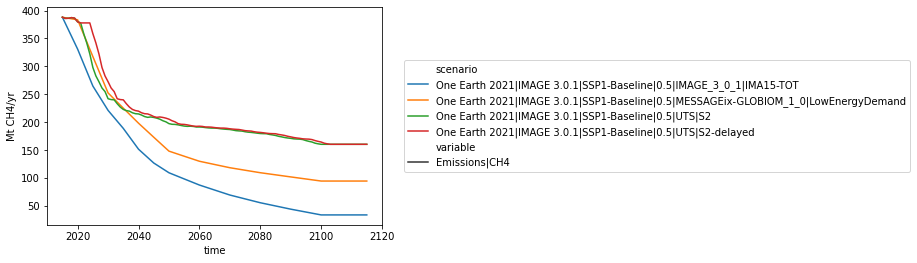

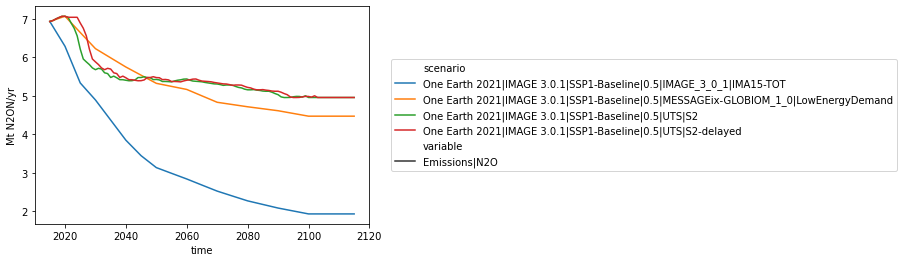

<IPython.core.display.Javascript object>

In [8]:
for vdf in emms_dat.groupby("variable"):
    ax = vdf.filter(
        scenario=[
            "One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|IMAGE_3_0_1|IMA15-TOT",
            "One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand",
            "One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2",
            "One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2-delayed",
        ]
    ).lineplot(style="variable")
    ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
    plt.show()

In [9]:
gsat = db.load(variable="Surface Air Temperature Change", region="World")

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [10]:
historical_ref_period = range(1850, 1900 + 1)
evaluation_period = range(1995, 2014 + 1)
target_median = 0.85

<IPython.core.display.Javascript object>

In [11]:
gsat_rel_to_ref_period = gsat.relative_to_ref_period_mean(year=historical_ref_period)
current_median = (
    gsat_rel_to_ref_period.filter(year=evaluation_period)
    .timeseries()
    .mean(axis=1)
    .median()
)
display(current_median)
shift = current_median - target_median
display(shift)
gsat_shifted = gsat_rel_to_ref_period - shift
new_median = (
    gsat_shifted.filter(year=evaluation_period).timeseries().mean(axis=1).median()
)
display(new_median)

0.8925340207402139

0.04253402074021395

0.8500000000000001

<IPython.core.display.Javascript object>

In [12]:
gsat_shifted.get_unique_meta("scenario")

['One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|not_applied|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|not_applied|MESSAGEix-GLOBIOM_1_0|Lo

<IPython.core.display.Javascript object>

In [13]:
out_dat = db.load(region="World", variable="*Flux*").append(gsat_shifted)
out_dat

Loading files:   0%|          | 0/2 [00:00<?, ?it/s]

<ScmRun (timeseries: 144000, timepoints: 401)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2150-01-01T00:00:00
Meta:
	       climate_model           model  reference_period_end_year  \
	0       MAGICCv7.5.3  One Earth 2021                        NaN   
	1       MAGICCv7.5.3  One Earth 2021                        NaN   
	2       MAGICCv7.5.3  One Earth 2021                        NaN   
	3       MAGICCv7.5.3  One Earth 2021                        NaN   
	4       MAGICCv7.5.3  One Earth 2021                        NaN   
	...              ...             ...                        ...   
	143995  MAGICCv7.5.3  One Earth 2021                     1900.0   
	143996  MAGICCv7.5.3  One Earth 2021                     1900.0   
	143997  MAGICCv7.5.3  One Earth 2021                     1900.0   
	143998  MAGICCv7.5.3  One Earth 2021                     1900.0   
	143999  MAGICCv7.5.3  One Earth 2021                     1900.0   
	
	        reference_period_start_year region  run_id  \
	0            

<IPython.core.display.Javascript object>

In [14]:
out_quantiles = [0.05, 0.17, 0.5, 0.83, 0.95]

<IPython.core.display.Javascript object>

In [15]:
out_dat_quantiles = scmdata.ScmRun(out_dat.quantiles_over("run_id", out_quantiles))
out_dat_quantiles

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


<ScmRun (timeseries: 1200, timepoints: 401)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2150-01-01T00:00:00
Meta:
	     climate_model           model  quantile  reference_period_end_year  \
	0     MAGICCv7.5.3  One Earth 2021      0.05                        NaN   
	1     MAGICCv7.5.3  One Earth 2021      0.05                        NaN   
	2     MAGICCv7.5.3  One Earth 2021      0.05                        NaN   
	3     MAGICCv7.5.3  One Earth 2021      0.05                        NaN   
	4     MAGICCv7.5.3  One Earth 2021      0.05                        NaN   
	...            ...             ...       ...                        ...   
	1195  MAGICCv7.5.3  One Earth 2021      0.95                     1900.0   
	1196  MAGICCv7.5.3  One Earth 2021      0.95                     1900.0   
	1197  MAGICCv7.5.3  One Earth 2021      0.95                     1900.0   
	1198  MAGICCv7.5.3  One Earth 2021      0.95                     1900.0   
	1199  MAGICCv7.5.3  One Earth 2021      0.95        

<IPython.core.display.Javascript object>

In [16]:
to_save = out_dat_quantiles.drop_meta(
    ["reference_period_start_year", "reference_period_end_year"]
)

for c in ["scenario", "model"]:
    to_save[c] = to_save[c].apply(lambda x: str(x))

to_save.to_nc(
    OUT_FILE,
    dimensions=(
        "scenario",
        "quantile",
    ),
    extras=("model",),
)

<IPython.core.display.Javascript object>

In [17]:
out_dat_box = []

groups = list(set(out_dat.meta.columns) - {"run_id"})
for end_average_period in (
    range(2031, 2050 + 1),
    range(2081, 2100 + 1),
):
    grouper = (
        out_dat.filter(year=end_average_period)
        .timeseries()
        .mean(axis=1)
        .groupby(groups)
    )
    for q in out_quantiles:
        tmp = grouper.quantile(q=q)
        tmp.name = "value"
        tmp = tmp.to_frame().reset_index()
        tmp["quantile"] = q
        tmp["evaluation_period_start_year"] = end_average_period[0]
        tmp["evaluation_period_end_year"] = end_average_period[-1]
        out_dat_box.append(tmp)

out_dat_box = pd.concat(out_dat_box)
out_dat_box.to_csv(OUT_FILE_BOX, index=False)
out_dat_box

climate_model                        variable region  \
0   MAGICCv7.5.3  Surface Air Temperature Change  World   
1   MAGICCv7.5.3  Surface Air Temperature Change  World   
2   MAGICCv7.5.3  Surface Air Temperature Change  World   
3   MAGICCv7.5.3  Surface Air Temperature Change  World   
4   MAGICCv7.5.3  Surface Air Temperature Change  World   
..           ...                             ...    ...   
75  MAGICCv7.5.3  Surface Air Temperature Change  World   
76  MAGICCv7.5.3  Surface Air Temperature Change  World   
77  MAGICCv7.5.3  Surface Air Temperature Change  World   
78  MAGICCv7.5.3  Surface Air Temperature Change  World   
79  MAGICCv7.5.3  Surface Air Temperature Change  World   

                                             scenario  \
0   One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
1   One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
2   One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
3   One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|...   
4   One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|I...   
..                                                ...   
75  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
76  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
77  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
78  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   
79  One Earth 2021|Idealised from IMAGE 3.0.1|End ...   

    reference_period_end_year           model unit  \
0                      1900.0  One Earth 2021    K   
1                      1900.0  One Earth 2021    K   
2                      1900.0  One Earth 2021    K   
3                      1900.0  One Earth 2021    K   
4                      1900.0  One Earth 2021    K   
..                        ...             ...  ...   
75                     1900.0  One Earth 2021    K   
76                     1900.0  One Earth 2021    K   
77                     1900.0  One Earth 2021    K   
78                     1900.0  One Earth 2021    K   
79                     1900.0  One Earth 2021    K   

    reference_period_start_year     value  quantile  \
0                        1850.0  1.163833      0.05   
1                        1850.0  1.210316      0.05   
2                        1850.0  1.188897      0.05   
3                        1850.0  1.231161      0.05   
4                        1850.0  1.156015      0.05   
..                          ...       ...       ...   
75                       1850.0  1.834984      0.95   
76                       1850.0  2.060514      0.95   
77                       1850.0  2.322355      0.95   
78                       1850.0  2.156785      0.95   
79                       1850.0  2.226752      0.95   

    evaluation_period_start_year  evaluation_period_end_year  
0                           2031                        2050  
1                           2031                        2050  
2                           2031                        2050  
3                           2031                        2050  
4                           2031                        2050  
..                           ...                         ...  
75                          2081                        2100  
76                          2081                        2100  
77                          2081                        2100  
78                          2081                        2100  
79                          2081                        2100  

[800 rows x 12 columns]

<IPython.core.display.Javascript object>

In [18]:
sorted(out_dat_box["scenario"].unique())

['One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.05|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.5|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|MESSAGEix-GLOBIOM_1_0|LowEnergyDemand',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|UTS|S2',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|0.95|UTS|S2-delayed',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|not_applied|IMAGE_3_0_1|IMA15-TOT',
 'One Earth 2021|IMAGE 3.0.1|SSP1-Baseline|not_applied|MESSAGEix-GLOBIOM_1_0|Lo

<IPython.core.display.Javascript object>